No handles with labels found to put in legend.


(array([8.769e+03, 3.970e+02, 2.970e+02, 2.100e+02, 1.360e+02, 1.490e+02,
        9.300e+01, 8.900e+01, 7.500e+01, 8.300e+01, 5.700e+01, 7.900e+01,
        2.600e+01, 6.100e+01, 4.800e+01, 4.500e+01, 2.900e+01, 3.100e+01,
        4.300e+01, 5.200e+01, 2.200e+01, 2.200e+01, 2.800e+01, 5.600e+01,
        1.200e+01, 1.400e+01, 2.100e+01, 2.000e+01, 1.300e+01, 2.000e+01,
        2.300e+01, 1.300e+01, 2.100e+01, 2.000e+01, 1.800e+01, 3.000e+01,
        2.200e+01, 1.700e+01, 2.600e+01, 1.800e+01, 1.600e+01, 2.200e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 7.000e+00, 1.000e+00, 2.300e+01,
        1.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 8.000e+00,
        0.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        5.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 2.000e+00, 1.100e+01,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 2.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 8.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

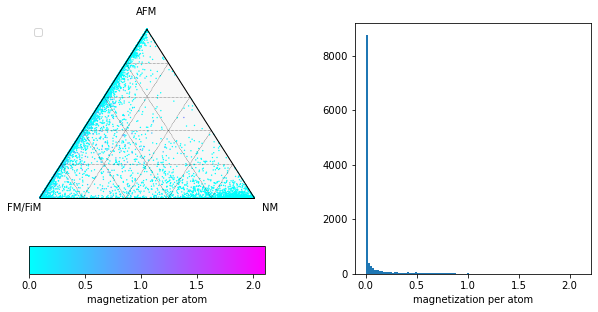

In [2]:
import matplotlib.pyplot as plt
import ternary
from matplotlib import gridspec
import numpy as np
import matplotlib as mpl
magnetization=np.load('magnetization2.npy') #total magnetization
vector=np.load('vector2.npy')  #output vector in ternary form
atomnumber=np.load('atomnumber.npy') #atom number
magnetization=magnetization/atomnumber  #magnetization per atom
fig=plt.figure(constrained_layout=True,figsize=(8,4))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
#figure.set_size_inches(10, 10)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')
cutoff=max(magnetization)
magnetization_cutoff=[x if x<cutoff else cutoff for x in magnetization]
sc=tax.scatter(vector, s=2, edgecolors='none',c=magnetization_cutoff, cmap=mpl.cm.cool,vmin=0,vmax=cutoff)
tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=cutoff)

cb1 = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('magnetization per atom')
ax3 = fig.add_subplot(gs[:,1])
ax3.set_xlabel('magnetization per atom')
plt.hist(magnetization_cutoff,100)
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')